## AutoEncoders on PointClouds - Modular Code

In [1]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

import tf_lab.point_clouds.in_out as pio
from tf_lab.point_clouds.in_out import PointCloudDataSet

from tf_lab.point_clouds.point_net_ae import PointNetAutoEncoder
from tf_lab.point_clouds.point_net_ae import Configuration as PN_Conf

# import tf_lab.point_clouds.various_encoders_decoders as enc_dec
# import tf_lab.models.point_net_based_AE as pnAE

from general_tools.in_out import create_dir
from geo_tool import Point_Cloud

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

In [3]:
data_path = '/Users/optas/DATA/Point_Clouds/Shape_Net_Core/from_manifold_meshes/1024/03001627'
train_dir = '/Users/optas/DATA/Neural_Nets/Models/Point_Cloud_AE/'

# data_path = '/orions4-zfs/projects/lins2/Panos_Space/DATA/ShapeNetPointClouds/from_manifold_meshes/1024/03001627/'
# train_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/'

experiment_name = 'scratch'
train_dir = osp.join(train_dir, experiment_name)

create_dir(train_dir)

'/Users/optas/DATA/Neural_Nets/Models/Point_Cloud_AE/scratch'

In [6]:
file_names = pio.load_filenames_of_input_data(data_path)


pclouds, model_names = pio.load_crude_point_clouds(file_names=file_names, n_threads=11)


train_data_, val_data_, test_data_ = pio.train_validate_test_split([pclouds, model_names],
                                                                   train_perc=0.8,
                                                                   validate_perc=0.1,
                                                                   test_perc=0.1,
                                                                   seed=seed)

train_data = PointCloudDataSet(train_data_[0], labels=train_data_[1])
val_data = PointCloudDataSet(val_data_[0], labels=val_data_[1])
test_data = PointCloudDataSet(test_data_[0], labels=test_data_[1])

# train_data = PointCloudDataSet(train_data_, noise={'frac':0.20, 'filler':0.0})
# val_data = PointCloudDataSet(val_data_, noise={'frac':0.20, 'filler':0.0})
# test_data = PointCloudDataSet(test_data_, noise={'frac':0.20, 'filler':0.0})

6778 files containing  point clouds were found.


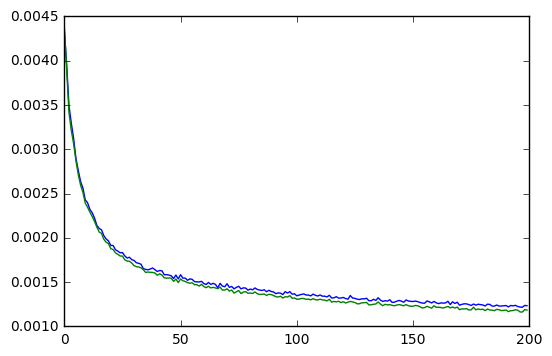

In [37]:
a = np.loadtxt('/Users/optas/Desktop/model_evaluation/vanilla_ae/enc_filter_1_complex_decoder/error-stats.txt')
np.sum(a[:,3] <= a[:,2])

plt.plot(range(len(a[:,2])), a[:,2])
plt.plot(range(len(a[:,1])), a[:,1])





In [10]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()


conf = PN_Conf(n_input = [1024, 3],
               training_epochs = 16,
               batch_size = 20,
               loss = 'l2',
               train_dir = train_dir,
               loss_display_step = 1,               
               saver_step = 2,
               saver_max_to_keep = 5,
               learning_rate = 0.0002,
               denoising = False
              )

reset_graph()
ae = PointNetAutoEncoder(experiment_name, conf)
ae.train(train_data, conf)


('Epoch:', '0001', 'training time (minutes)=', '0.0721', 'loss=', '0.015513058')
('Epoch:', '0002', 'training time (minutes)=', '0.0539', 'loss=', '0.014662071')
('Epoch:', '0003', 'training time (minutes)=', '0.0536', 'loss=', '0.014524366')
('Epoch:', '0004', 'training time (minutes)=', '0.0540', 'loss=', '0.014451731')
('Epoch:', '0005', 'training time (minutes)=', '0.0575', 'loss=', '0.014400056')
('Epoch:', '0006', 'training time (minutes)=', '0.0583', 'loss=', '0.014354029')
('Epoch:', '0007', 'training time (minutes)=', '0.0545', 'loss=', '0.014311319')
('Epoch:', '0008', 'training time (minutes)=', '0.0540', 'loss=', '0.014274926')
('Epoch:', '0009', 'training time (minutes)=', '0.0543', 'loss=', '0.014242324')
('Epoch:', '0010', 'training time (minutes)=', '0.0544', 'loss=', '0.014217878')
('Epoch:', '0011', 'training time (minutes)=', '0.0543', 'loss=', '0.014188154')
('Epoch:', '0012', 'training time (minutes)=', '0.0543', 'loss=', '0.014156700')
('Epoch:', '0013', 'training

[(1, 0.015513058284441923, 4.325829029083252),
 (2, 0.014662070718776036, 3.231682062149048),
 (3, 0.01452436573748439, 3.2152631282806396),
 (4, 0.014451730546173795, 3.2403531074523926),
 (5, 0.014400056161233859, 3.4529199600219727),
 (6, 0.014354029416048219, 3.497802972793579),
 (7, 0.014311318907790518, 3.271981954574585),
 (8, 0.01427492623413291, 3.239827871322632),
 (9, 0.014242323967748462, 3.256922960281372),
 (10, 0.014217877897994105, 3.263293981552124),
 (11, 0.01418815357301288, 3.258782148361206),
 (12, 0.014156700008827162, 3.2559449672698975),
 (13, 0.014137931140586459, 3.25374698638916),
 (14, 0.014105841572434261, 3.277963161468506),
 (15, 0.01408395581153596, 3.2599499225616455),
 (16, 0.01406293435922628, 3.297757148742676)]

In [13]:
reset_graph()
ae = PointNetAutoEncoder(experiment_name, conf)
ae.restore_model(conf.train_dir, 64)
conf.training_epochs = 50
conf.loss = 'Chamfer'
ae.train(train_data, conf)

Model restored in epoch 64.
('Epoch:', '0065', 'training time (minutes)=', '0.0642', 'loss=', '0.012697512')
('Epoch:', '0066', 'training time (minutes)=', '0.0626', 'loss=', '0.012667810')
('Epoch:', '0067', 'training time (minutes)=', '0.0625', 'loss=', '0.012652160')
('Epoch:', '0068', 'training time (minutes)=', '0.0626', 'loss=', '0.012629045')
('Epoch:', '0069', 'training time (minutes)=', '0.0622', 'loss=', '0.012612440')
('Epoch:', '0070', 'training time (minutes)=', '0.0625', 'loss=', '0.012593937')
('Epoch:', '0071', 'training time (minutes)=', '0.0626', 'loss=', '0.012568735')
('Epoch:', '0072', 'training time (minutes)=', '0.0627', 'loss=', '0.012553152')
('Epoch:', '0073', 'training time (minutes)=', '0.0632', 'loss=', '0.012539009')
('Epoch:', '0074', 'training time (minutes)=', '0.0625', 'loss=', '0.012519164')
('Epoch:', '0075', 'training time (minutes)=', '0.0632', 'loss=', '0.012494665')
('Epoch:', '0076', 'training time (minutes)=', '0.0634', 'loss=', '0.012475728')


[(65, 0.012697511844034564, 3.8490238189697266),
 (66, 0.01266780976769669, 3.758256196975708),
 (67, 0.01265215964444889, 3.7483510971069336),
 (68, 0.012629044785188353, 3.7576589584350586),
 (69, 0.012612440221259074, 3.7304580211639404),
 (70, 0.012593936511896194, 3.752977132797241),
 (71, 0.012568735400716537, 3.7530291080474854),
 (72, 0.012553151861877899, 3.7635409832000732),
 (73, 0.01253900887286531, 3.7946090698242188),
 (74, 0.012519164330487541, 3.7474780082702637),
 (75, 0.012494664749206212, 3.7915070056915283),
 (76, 0.012475727888930768, 3.8038361072540283),
 (77, 0.01246068272327255, 3.7994539737701416),
 (78, 0.012438881025405607, 3.777522087097168),
 (79, 0.012421081602106015, 3.761646032333374),
 (80, 0.012400297908545421, 3.769214153289795),
 (81, 0.012386376969516277, 3.8005449771881104),
 (82, 0.012367646017445189, 3.7930490970611572),
 (83, 0.01235469466425836, 3.808253049850464),
 (84, 0.012331194096550731, 3.762901782989502),
 (85, 0.0123116389927334, 3.7966